## RED WINE QUALITY 
### Author : Simphiwe Motau
### Date : 03 April 2023
### Source : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
<img src="https://lahealthyliving.com/wp-content/uploads/2013/03/redwine1.jpg" alt="red wine" style="width:200px;"/>


<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center">IMPORT DATA AND LIBRARIES</p>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#Read file
wine_df = pd.read_csv("C:/Users/User/OneDrive/Desktop/Data Analytics/winequality-red.csv")
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center"> DATA CLEANING</p>

In [2]:
#Check missing values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [6]:
wine_df.shape

(1599, 12)

In [7]:
wine_df.drop_duplicates()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
wine_df.drop_duplicates(subset=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'],keep=False,inplace=True)
wine_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.9943,3.58,0.52,9.9,5
13,7.8,0.610,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5


In [9]:
wine_df.rank().T.style.background_gradient(cmap='Purples')

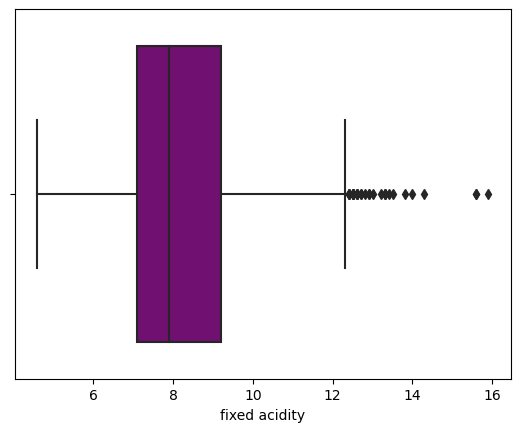

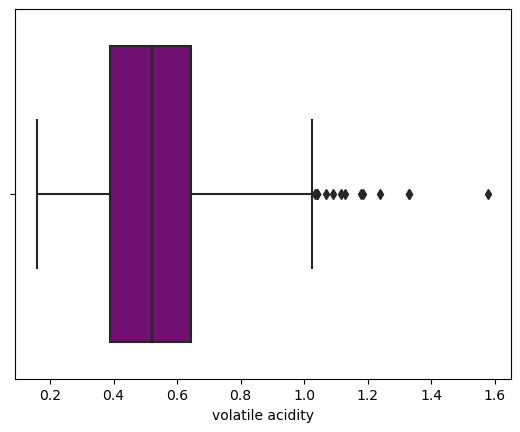

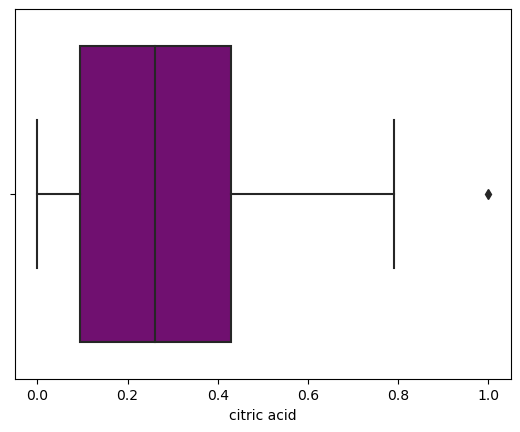

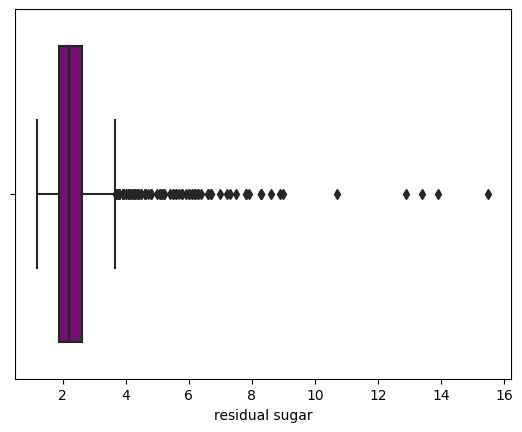

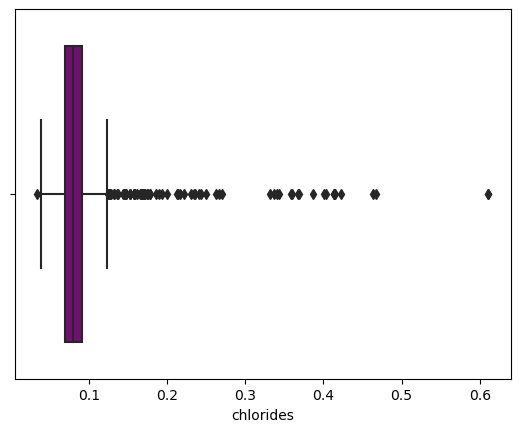

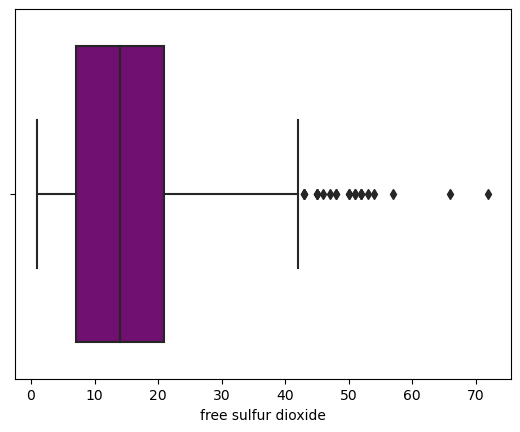

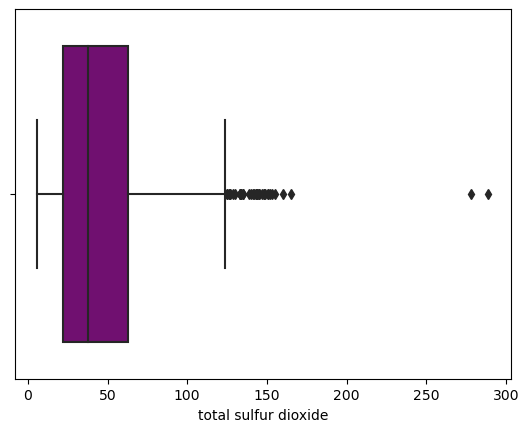

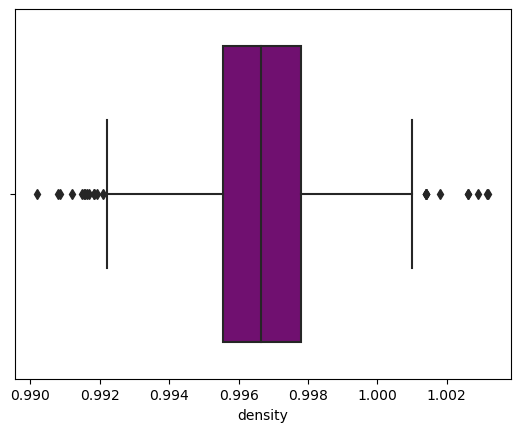

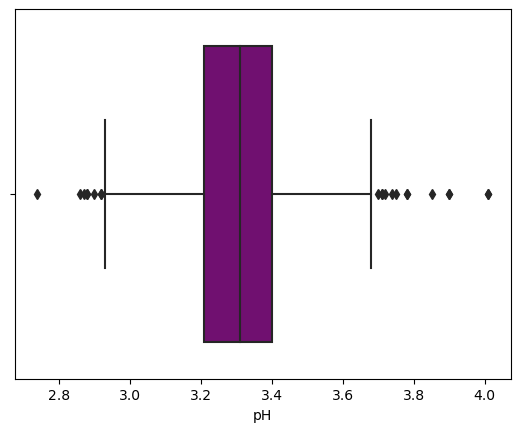

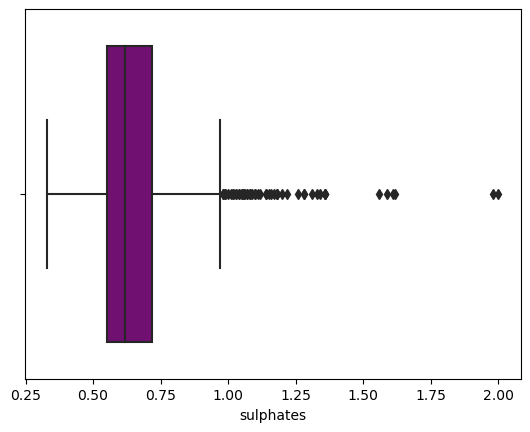

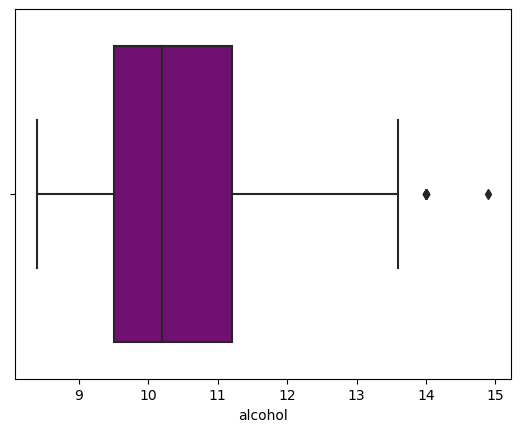

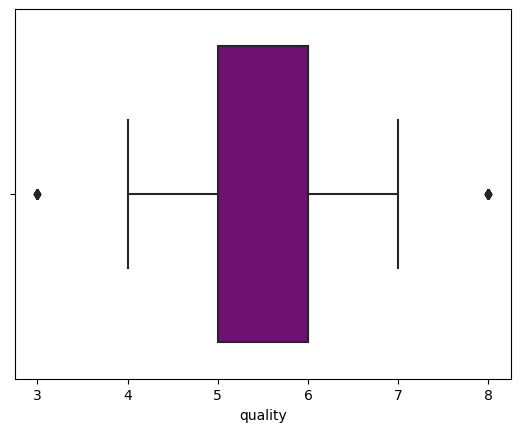

In [10]:
cols =wine_df.columns.values
for i in cols:
  
    sns.boxplot(x=wine_df[i],whis=1.5,color='Purple',orient='h')
    plt.show();

In [11]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [12]:
for column in wine_df[cols].columns:
    lr,ur=remove_outlier(wine_df[column])
    wine_df[column]=np.where(wine_df[column]>ur,ur,wine_df[column])
    wine_df[column]=np.where(wine_df[column]<lr,lr,wine_df[column])

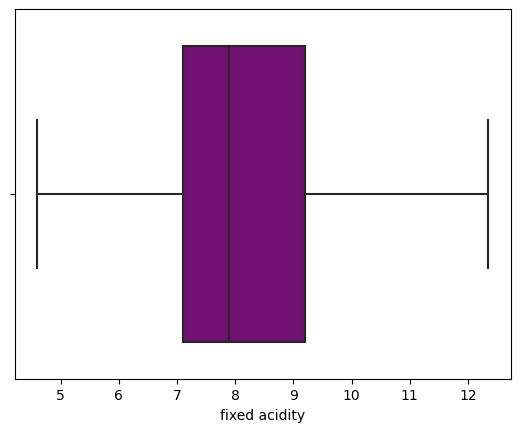

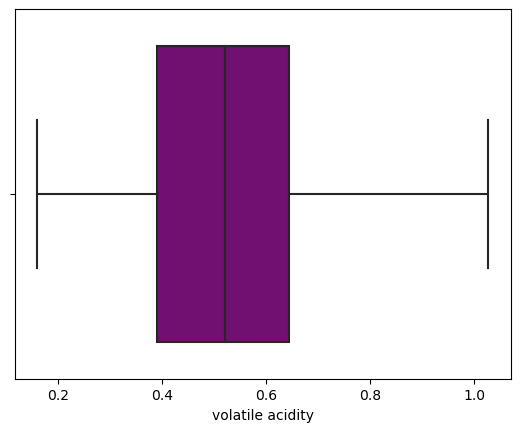

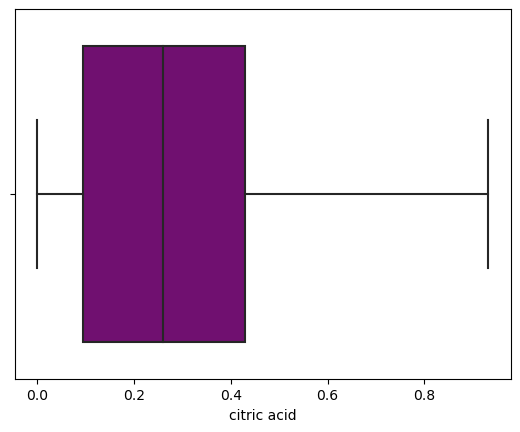

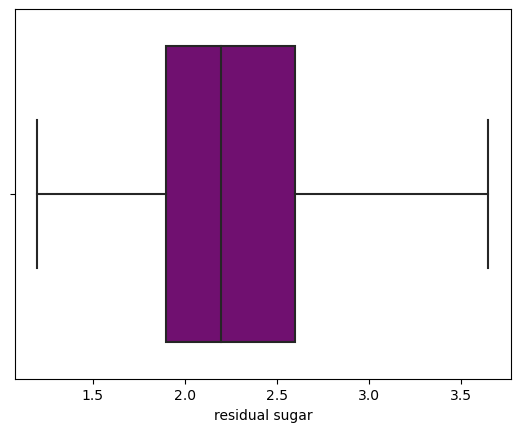

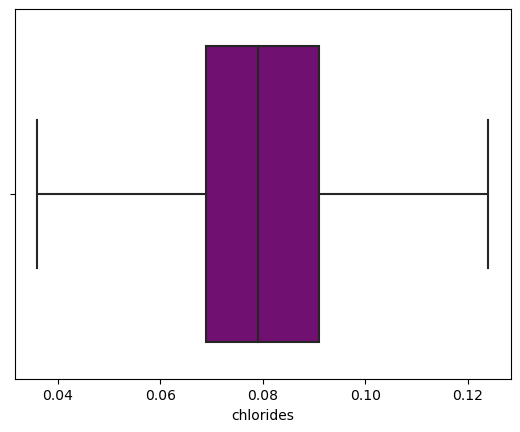

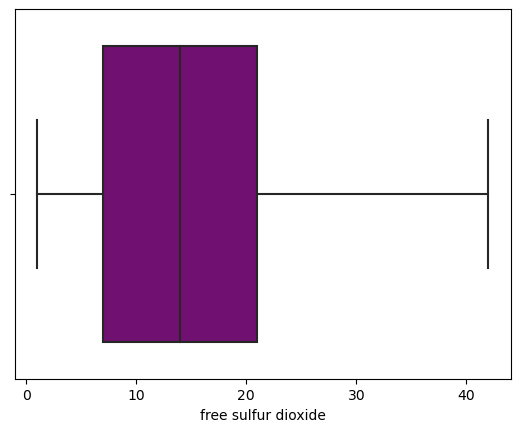

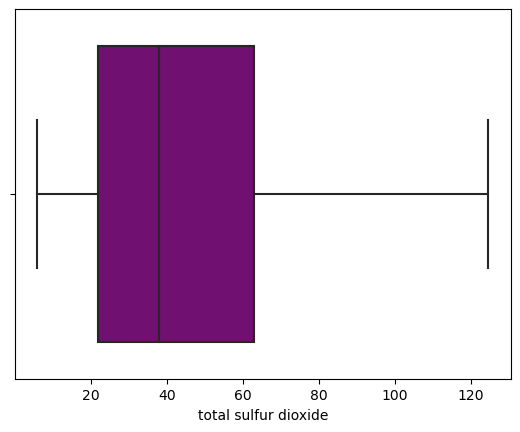

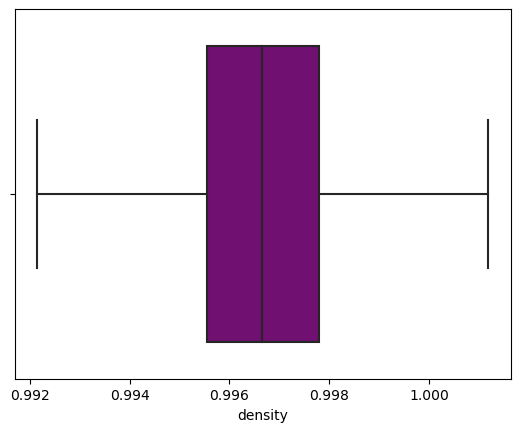

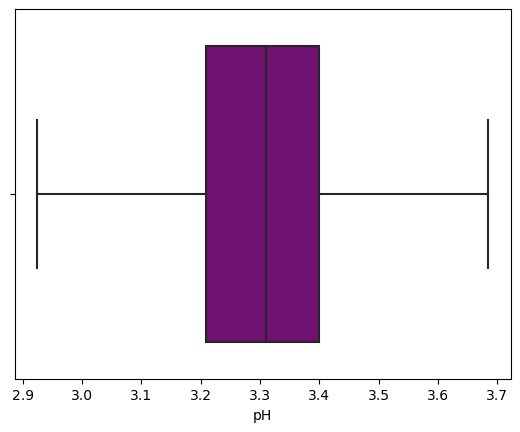

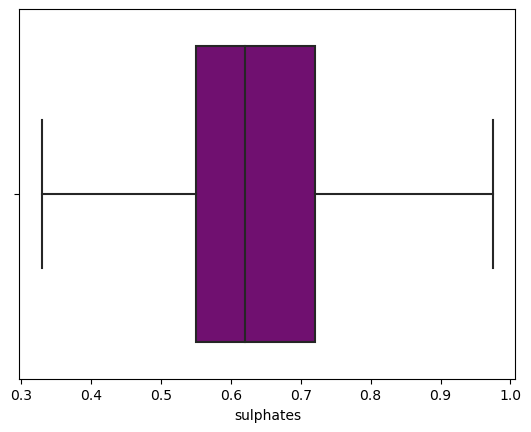

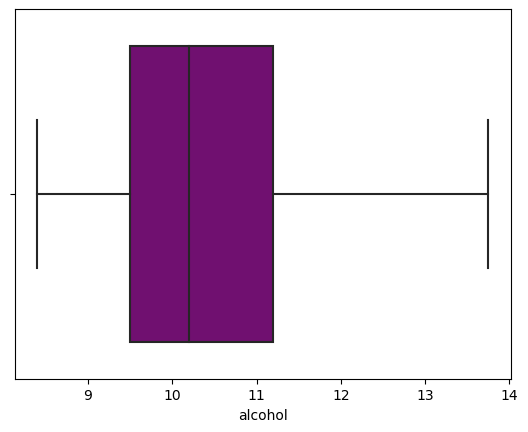

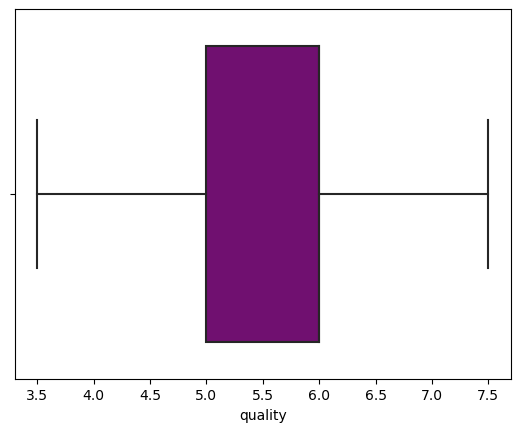

In [13]:
cols =wine_df.columns.values
for i in cols:
    sns.boxplot(x=wine_df[i],whis=1.5,color='purple',orient='h')
    plt.show();

<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center"> DATA ANALYSIS</p>

In [14]:
wine_df.describe().T.style.background_gradient(cmap='PuRd')

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1139.000000,8.264925,1.657343,4.600000,7.100000,7.900000,9.200000,12.350000
volatile acidity,1139.000000,0.529399,0.182075,0.160000,0.390000,0.520000,0.645000,1.027500
citric acid,1139.000000,0.273417,0.196161,0.000000,0.095000,0.260000,0.430000,0.932500
residual sugar,1139.000000,2.321598,0.604188,1.200000,1.900000,2.200000,2.600000,3.650000
chlorides,1139.000000,0.081365,0.019022,0.036000,0.069000,0.079000,0.091000,0.124000
free sulfur dioxide,1139.000000,15.763828,9.846157,1.000000,7.000000,14.000000,21.000000,42.000000
total sulfur dioxide,1139.000000,46.334943,31.171136,6.000000,22.000000,38.000000,63.000000,124.500000
density,1139.000000,0.996648,0.001786,0.992150,0.995540,0.996660,0.997800,1.001190
pH,1139.000000,3.307827,0.149464,2.925000,3.210000,3.310000,3.400000,3.685000
sulphates,1139.000000,0.648955,0.134872,0.330000,0.550000,0.620000,0.720000,0.975000


In [15]:
stats.hmean(wine_df.iloc[:,1:3],axis=0)

array([0.46611682, 0.        ])

In [16]:
#Range for each colunmns
wine_df.max()-wine_df.min()

fixed acidity             7.75000
volatile acidity          0.86750
citric acid               0.93250
residual sugar            2.45000
chlorides                 0.08800
free sulfur dioxide      41.00000
total sulfur dioxide    118.50000
density                   0.00904
pH                        0.76000
sulphates                 0.64500
alcohol                   5.35000
quality                   4.00000
dtype: float64

In [17]:
#Mean for each column
wine_df.mean()

fixed acidity            8.264925
volatile acidity         0.529399
citric acid              0.273417
residual sugar           2.321598
chlorides                0.081365
free sulfur dioxide     15.763828
total sulfur dioxide    46.334943
density                  0.996648
pH                       3.307827
sulphates                0.648955
alcohol                 10.439757
quality                  5.605795
dtype: float64

In [18]:
#Median for each column
wine_df.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99666
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [19]:
#Mode for each column
wine_df.mode().T.style.background_gradient(cmap='PuRd')

,0,1,2
fixed acidity,7.800000,nan,nan
volatile acidity,0.580000,nan,nan
citric acid,0.000000,nan,nan
residual sugar,2.000000,nan,nan
chlorides,0.124000,nan,nan
free sulfur dioxide,6.000000,nan,nan
total sulfur dioxide,124.500000,nan,nan
density,0.996800,nan,nan
pH,3.260000,3.300000,3.340000
sulphates,0.975000,nan,nan


In [20]:
#Variance
wine_df.var()

fixed acidity             2.746785
volatile acidity          0.033151
citric acid               0.038479
residual sugar            0.365043
chlorides                 0.000362
free sulfur dioxide      96.946810
total sulfur dioxide    971.639692
density                   0.000003
pH                        0.022339
sulphates                 0.018190
alcohol                   1.194363
quality                   0.660371
dtype: float64

In [21]:
#Skewness
wine_df.skew()

fixed acidity           0.651387
volatile acidity        0.504448
citric acid             0.294631
residual sugar          0.808883
chlorides               0.519580
free sulfur dioxide     0.855512
total sulfur dioxide    0.968743
density                -0.007247
pH                      0.076858
sulphates               0.786882
alcohol                 0.816861
quality                 0.148062
dtype: float64

In [22]:
wine_df.kurtosis()

fixed acidity          -0.037503
volatile acidity       -0.123984
citric acid            -0.837564
residual sugar         -0.017280
chlorides               0.122160
free sulfur dioxide    -0.025055
total sulfur dioxide    0.066783
density                 0.109420
pH                     -0.083277
sulphates               0.029743
alcohol                -0.089042
quality                -0.269692
dtype: float64

<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center"> VISUALIZE DATA</p>

In [23]:
#Covariance
wine_df.cov().T.style.background_gradient(cmap='BuPu')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,2.746785,-0.080874,0.215780,0.221151,0.006547,-1.968528,-4.845272,0.001993,-0.172366,0.054416,-0.131593,0.157141
volatile acidity,-0.080874,0.033151,-0.020032,0.004080,0.000524,-0.042510,0.483250,0.000009,0.007154,-0.007741,-0.040223,-0.059780
citric acid,0.215780,-0.020032,0.038479,0.020850,0.000541,-0.051521,0.286392,0.000123,-0.016503,0.009763,0.021776,0.037376
residual sugar,0.221151,0.004080,0.020850,0.365043,0.002137,0.420659,2.749724,0.000424,-0.009627,0.000291,0.073022,0.005622
chlorides,0.006547,0.000524,0.000541,0.002137,0.000362,-0.000613,0.070961,0.000014,-0.000773,0.000372,-0.006649,-0.003141
free sulfur dioxide,-1.968528,-0.042510,-0.051521,0.420659,-0.000613,96.946810,209.893102,-0.000246,0.056560,0.064661,-1.026630,-0.443358
total sulfur dioxide,-4.845272,0.483250,0.286392,2.749724,0.070961,209.893102,971.639692,0.006442,-0.410554,-0.057921,-8.911673,-5.028656
density,0.001993,0.000009,0.000123,0.000424,0.000014,-0.000246,0.006442,0.000003,-0.000097,0.000037,-0.001014,-0.000287
pH,-0.172366,0.007154,-0.016503,-0.009627,-0.000773,0.056560,-0.410554,-0.000097,0.022339,-0.003499,0.034558,-0.006130
sulphates,0.054416,-0.007741,0.009763,0.000291,0.000372,0.064661,-0.057921,0.000037,-0.003499,0.018190,0.025218,0.038030


In [24]:
#Correlation
wine_df.corr().T.style.background_gradient(cmap='BuPu')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.268006,0.663721,0.220854,0.207680,-0.120632,-0.093789,0.673376,-0.695831,0.243442,-0.072653,0.116677
volatile acidity,-0.268006,1.000000,-0.560871,0.037090,0.151179,-0.023713,0.085147,0.027079,0.262873,-0.315220,-0.202141,-0.404031
citric acid,0.663721,-0.560871,1.000000,0.175922,0.144877,-0.026675,0.046838,0.350659,-0.562861,0.369029,0.101575,0.234472
residual sugar,0.220854,0.037090,0.175922,1.000000,0.185980,0.070712,0.146004,0.392613,-0.106607,0.003566,0.110589,0.011450
chlorides,0.207680,0.151179,0.144877,0.185980,1.000000,-0.003274,0.119675,0.405395,-0.271725,0.144960,-0.319845,-0.203167
free sulfur dioxide,-0.120632,-0.023713,-0.026675,0.070712,-0.003274,1.000000,0.683878,-0.013983,0.038433,0.048692,-0.095407,-0.055411
total sulfur dioxide,-0.093789,0.085147,0.046838,0.146004,0.119675,0.683878,1.000000,0.115705,-0.088122,-0.013777,-0.261600,-0.198521
density,0.673376,0.027079,0.350659,0.392613,0.405395,-0.013983,0.115705,1.000000,-0.364025,0.154190,-0.519445,-0.197615
pH,-0.695831,0.262873,-0.562861,-0.106607,-0.271725,0.038433,-0.088122,-0.364025,1.000000,-0.173599,0.211563,-0.050468
sulphates,0.243442,-0.315220,0.369029,0.003566,0.144960,0.048692,-0.013777,0.154190,-0.173599,1.000000,0.171087,0.346988


<AxesSubplot:title={'center':'Correlation of Features'}>

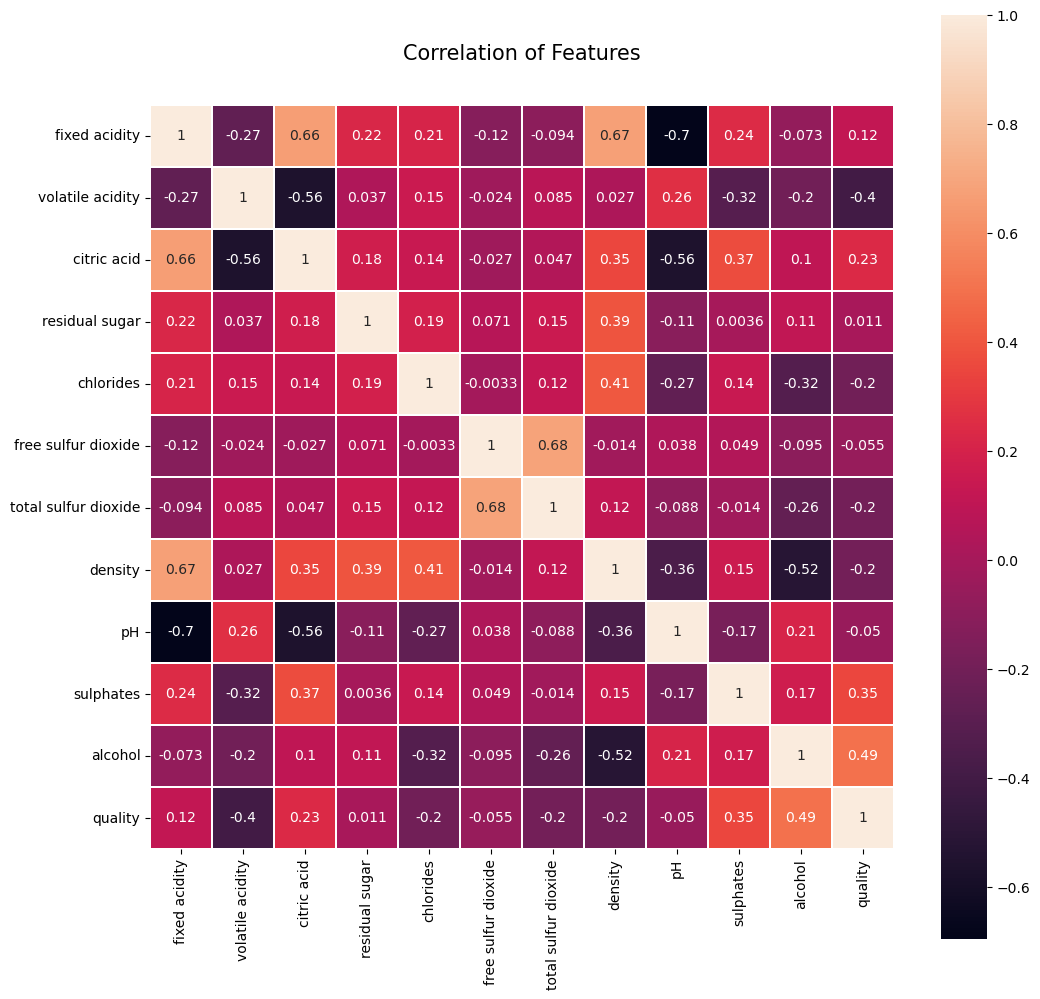

In [25]:
colormap=plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features',y=1.05,size=15)
sns.heatmap(wine_df.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, linecolor='white',annot=True)

#### Conclusion from above figure:
<p>1.Alcohol is positively correlated with the quality of red  wine</p>
<p>2.Alcohol has a weak positive correlation with pH value</p>
<p>3.Citric acid has a strong positive correlation with fixed acidity</p>
<p>4.Density has a strong positive correlation with fixed acidity</p>

   

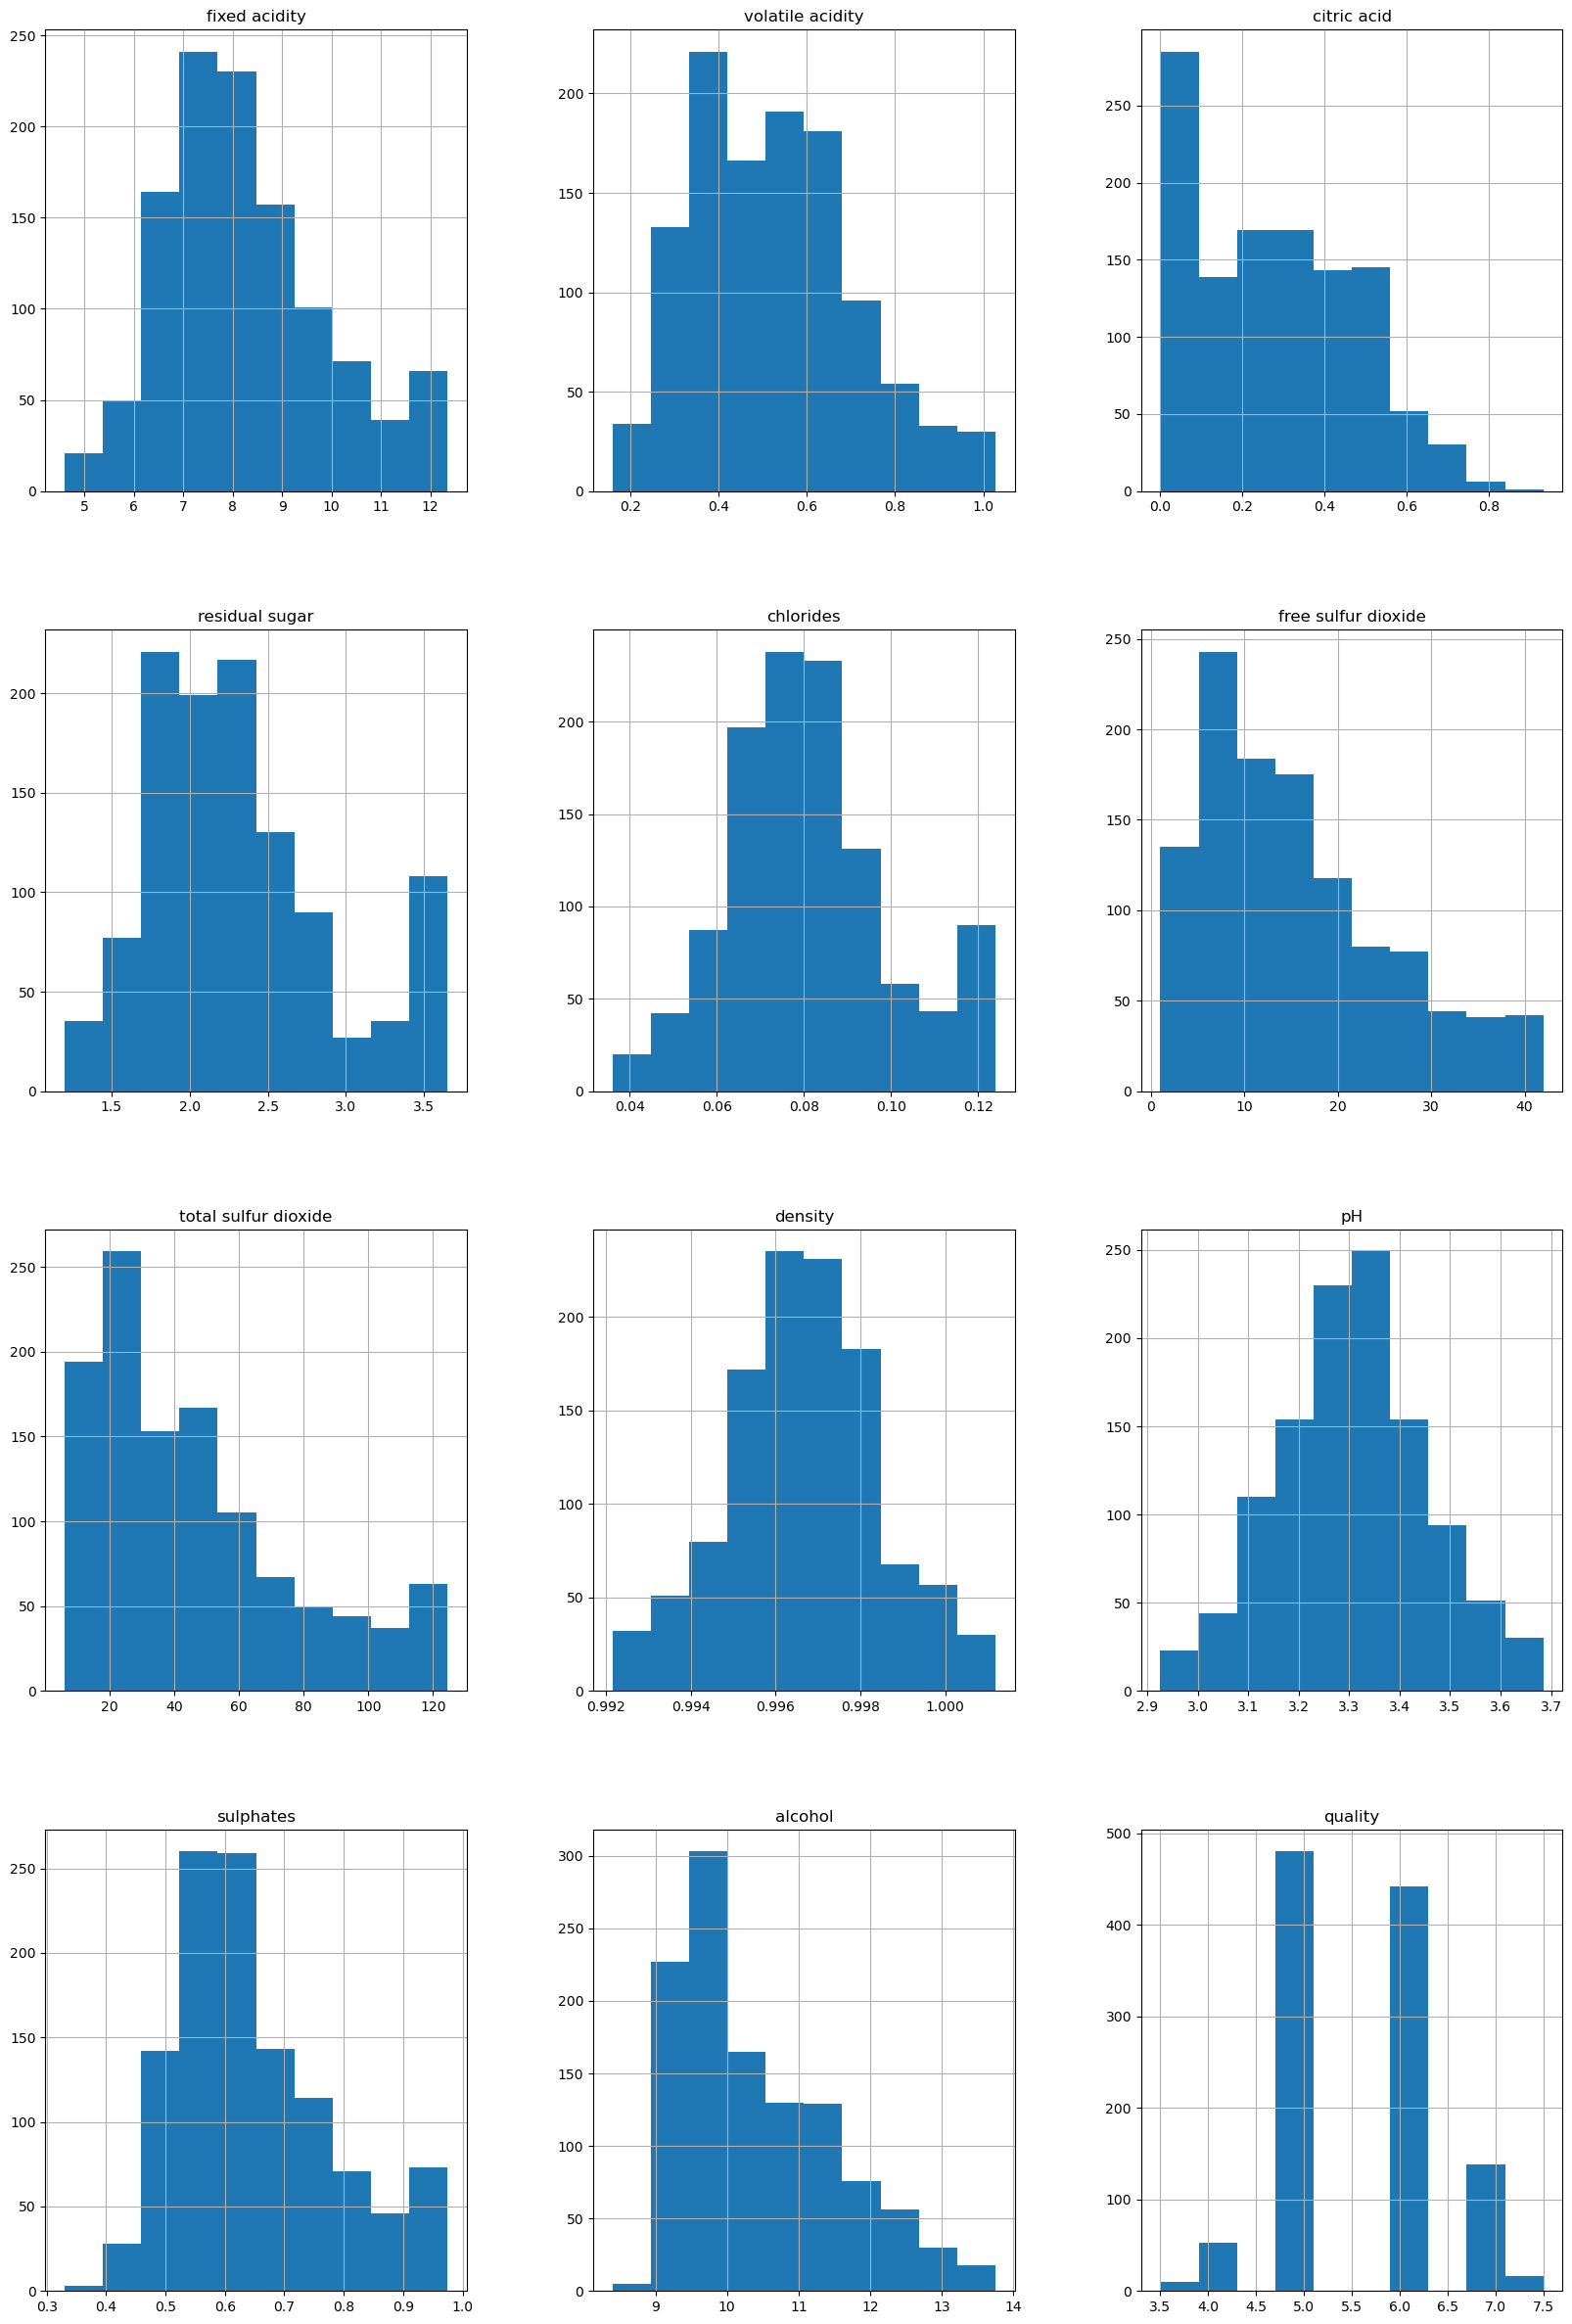

In [26]:
#Distribution skewness
wine_df.hist(figsize=(20,30));

<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center">ALCOHOL VS QUALITY</p>

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

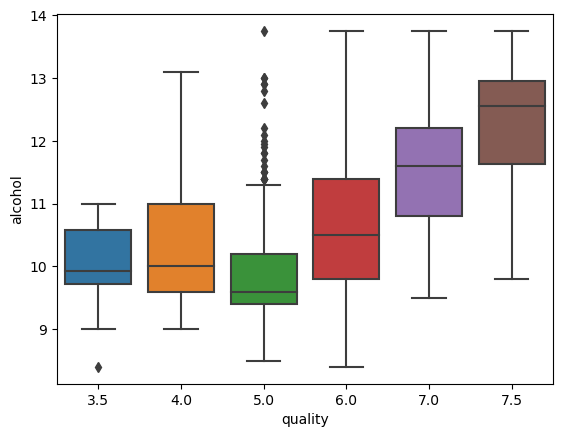

In [27]:
sns.boxplot(x='quality', y='alcohol',data=wine_df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

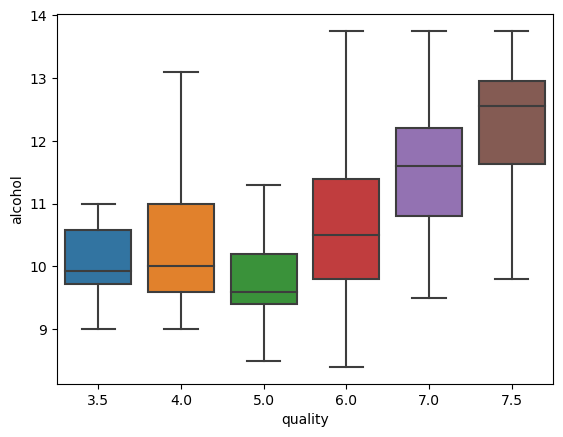

In [28]:
#Remove the outlier
sns.boxplot(x='quality', y='alcohol', data = wine_df, showfliers=False)

#### Conclusion from above figure
<p>The figure shows the increase in alcohol,increases the quality of wine.Therefore the quality of wine is directly related to the amount of alcohol in the wine.</p>

<AxesSubplot:xlabel='alcohol', ylabel='density'>

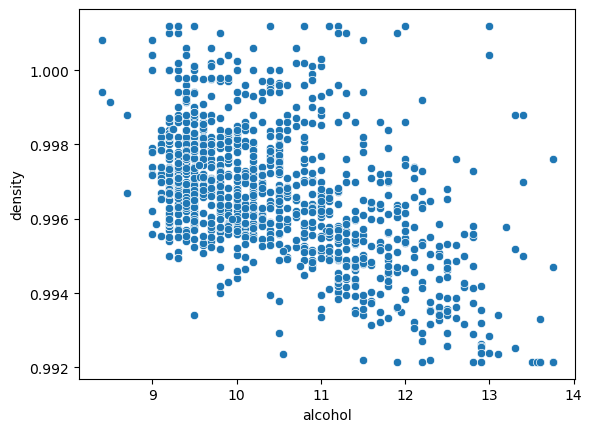

In [29]:
sns.scatterplot(x='alcohol',y='density',data=wine_df)

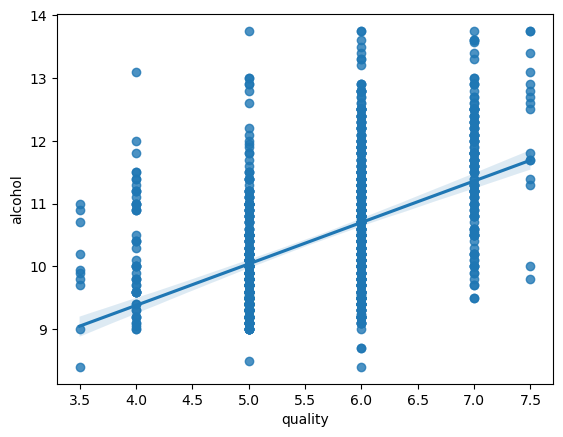

In [30]:
sns.regplot(data=wine_df,x='quality',y='alcohol')
plt.show()

#### Conclusions from the figure
<p>The higher the alcohol concentration,the higher the quality of the wine.

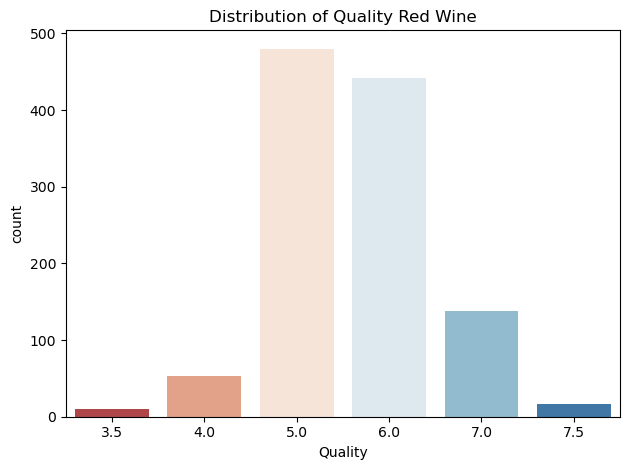

In [31]:
sns.countplot(x='quality',data=wine_df,palette='RdBu')
plt.title('Distribution of Quality Red Wine')
plt.xlabel('Quality')
plt.tight_layout()

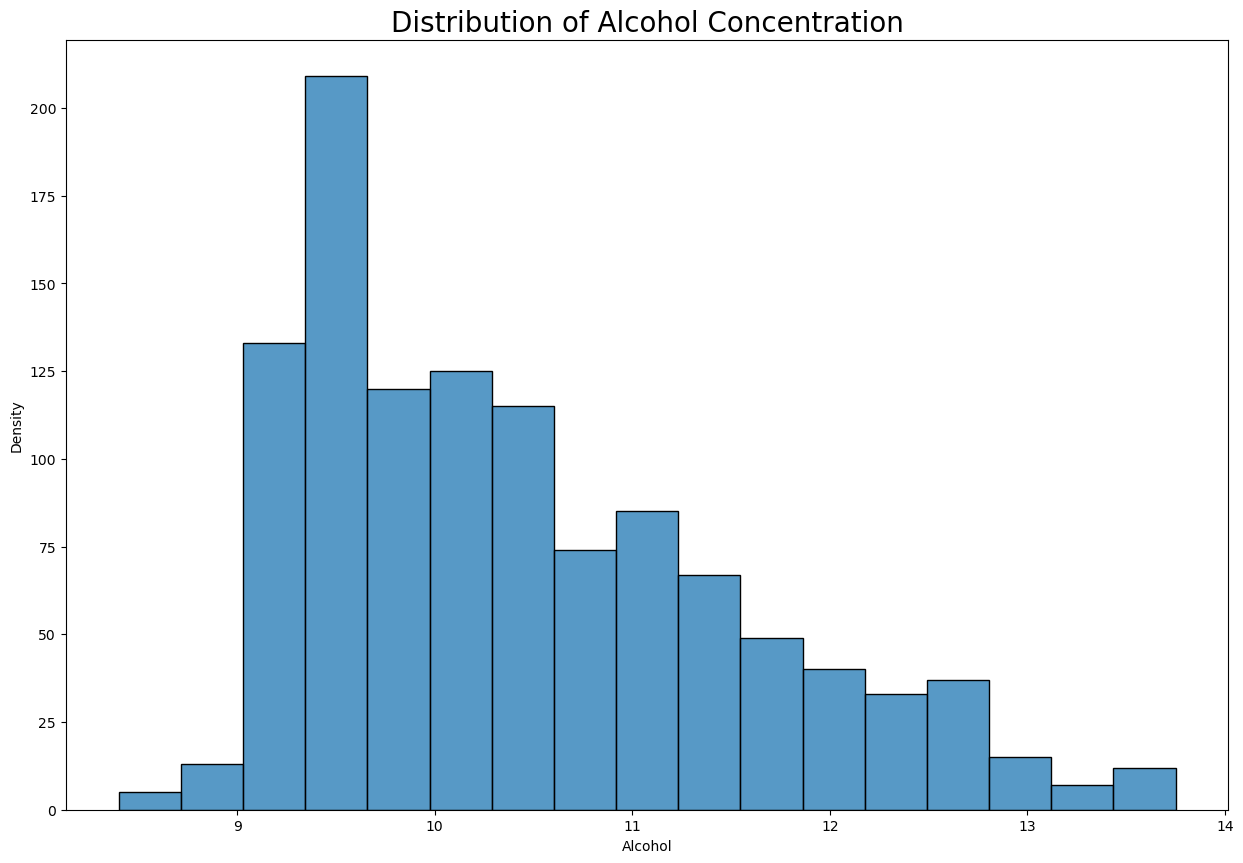

In [32]:
plt.figure(figsize=(15,10))
ax = sns.histplot(wine_df['alcohol'])
ax.set_title('Distribution of Alcohol Concentration', size=20)
ax.set(ylabel='Density', xlabel='Alcohol');

<p style= "background-color:#4B0082;font-family:newtimeroman;color:#FFF9ED;border-radius:20px 20px;font-size:160%;text-align:center"> REFLECTION</p>

<p>Python is a high-level object-oriented programming language with built-in dynamic semantics for web and application development. Excel is a spreadsheet programme that is used to execute and organise computations on data.In comparison to Excel, Python is more reliable and consistent. Instead of keeping processed datasets in numerous files or spreadsheets, Python enables users to allocate processed datasets in code or variables. While processing large datasets, Excel takes longer and uses more space. Python offers more interactive graphs than Excel and processes large datasets more quickly and efficiently.</p>
<p>Python is one of the programming languages used more than Excel due to the computational capabilities it offers diverse   libraries for data analysis and visualisation tools which are used to create graphs.Offers simplicity and readability which</p>

Excel is used for the following purposes:
<p>1.To store,analyze and report a large amount of data</p>
<p>2.To perform different computation such as accounting/finance</p>
<p>3.Used for project management,visual representation,goal planning worksheet</p>

Python is used for the following purposes:
<p>1.Data analysis and data visualization</p>
<p>2.Creating software applications and websites</p>
<p>3.Automate tasks and conduct software testing</p>
<p>4.Machine learning and artificial intelligence</p>

What I would do differently?
<p>Train the dataset for machine learning and see how it will analyse data and explore other different modules offered to
    understand how they analyse data and the different graphics the module offers.Use a complex dataset to learn more on how to clean data and know how to interprete complex data after data analysis,also on how to apply machine learningsns.</p>
    
What are the gaps in your programming or stats knowledge?
</p> Understanding that statistics is a broad subject is not only used in finance,it is also used in healthcare,data science,weather forecasting,business and manufacturing sector.There different types of statistics which have different functions when used to analyse data for example inferential statistical analysis</p>